## Chain using LangGraph

In [1]:
from dotenv import load_dotenv
import os
load_dotenv("./.env")

os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [8]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint

messages = [AIMessage(content=f"Please tell how can I help", name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding", name="Cris"))
messages.append(AIMessage(content=f"Please tell which programming language you want to know", name="LLMModel"))
messages.append(HumanMessage(content=f"I want to learn C++ language", name="LLMModel"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMModel

Please tell how can I help
================================ Human Message =================================
Name: Cris

I want to learn coding
================================== Ai Message ==================================
Name: LLMModel

Please tell which programming language you want to know
================================ Human Message =================================
Name: LLMModel

I want to learn C++ language


In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="openai/gpt-oss-20b")

In [7]:
response = llm.invoke(messages)
response.content

'### 🚀 Quick‑Start Roadmap for Learning C++ (2025)\n\n| Stage | What you’ll learn | Why it matters | Suggested resources | Practice ideas |\n|-------|-------------------|----------------|---------------------|----------------|\n| **1️⃣ Setup & Basics** | Install a compiler, IDE, and write “Hello, World!” | You need a working environment and the syntax of C++ fundamentals. | • **IDE**: Visual Studio Code (VS\u202fCode) + C/C++ extension<br>• **Compiler**: GCC (Linux/macOS) or MSVC (Windows)<br>• **Tutorial**: “C++ Primer” – Chapters 1‑3 or the free **cppreference.com** “Getting Started” guide | Write a program that prints your name, age, and a short message. |\n| **2️⃣ Core Language Features** | Variables, data types, operators, control flow, functions, arrays, pointers, references | These are the building blocks of every C++ program. | • **Book**: *C++ Primer* (Chapters 4‑8)<br>• **Online**: **LearnCpp.com** (chapters 4‑12)<br>• **Video**: “C++ Programming Basics” (YouTube – freeCodeCa

In [8]:
print(response.content)

### 🚀 Quick‑Start Roadmap for Learning C++ (2025)

| Stage | What you’ll learn | Why it matters | Suggested resources | Practice ideas |
|-------|-------------------|----------------|---------------------|----------------|
| **1️⃣ Setup & Basics** | Install a compiler, IDE, and write “Hello, World!” | You need a working environment and the syntax of C++ fundamentals. | • **IDE**: Visual Studio Code (VS Code) + C/C++ extension<br>• **Compiler**: GCC (Linux/macOS) or MSVC (Windows)<br>• **Tutorial**: “C++ Primer” – Chapters 1‑3 or the free **cppreference.com** “Getting Started” guide | Write a program that prints your name, age, and a short message. |
| **2️⃣ Core Language Features** | Variables, data types, operators, control flow, functions, arrays, pointers, references | These are the building blocks of every C++ program. | • **Book**: *C++ Primer* (Chapters 4‑8)<br>• **Online**: **LearnCpp.com** (chapters 4‑12)<br>• **Video**: “C++ Programming Basics” (YouTube – freeCodeCamp) | Creat

## Tools

In [5]:
def add(a:int,b:int)->int:
    """Add a and b
    Args:
        a(int): first int
        b(int): second int
    
    Returns:
        int
    """
    return a+b

In [3]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002A8C6A956A0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002A8C6A963C0>, model_name='openai/gpt-oss-20b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
## Binding tools with llm

llm_with_tools = llm.bind_tools([add])

In [10]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2+2", name="Cris")])

In [11]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'fc_72eaf76c-bc56-48b4-b8c3-e6753959fc4a',
  'type': 'tool_call'}]

In [12]:
### Use messages as state
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class State(TypedDict):
    message:list[AnyMessage]

In [37]:
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]

In [38]:
### Reducer with add_message

initial_messages = [AIMessage(content=f"Please tell how can I help", name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding", name="Cris"))
initial_messages

[AIMessage(content='Please tell how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Cris')]

In [39]:
ai_message = AIMessage(content=f"Please tell which programming language you want to know", name="LLMModel")

In [40]:
add_messages(initial_messages, ai_message)

[AIMessage(content='Please tell how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='6681197d-f377-4ac9-b629-d53ca23be1f4'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Cris', id='326b041f-b260-4032-82d5-4a8520ec3497'),
 AIMessage(content='Please tell which programming language you want to know', additional_kwargs={}, response_metadata={}, name='LLMModel', id='61118e25-3894-496d-bcf0-ecc7da0a4dc7')]

In [41]:
# Chatbot node functionality
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

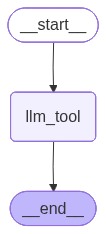

In [47]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)

builder.add_node("llm_tool", llm_tool)

builder.add_edge(START, "llm_tool")
builder.add_edge("llm_tool", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
## invoke

messages = graph.invoke({"messages":"What is 2 plus 2"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (fc_3c945a40-4c13-4d60-b48f-a82ec8687090)
 Call ID: fc_3c945a40-4c13-4d60-b48f-a82ec8687090
  Args:
    a: 2
    b: 2


In [44]:
tools = [add]

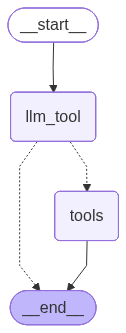

In [52]:
# Add tool node
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(State)

builder.add_node("llm_tool", llm_tool)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    tools_condition
)
builder.add_edge("llm_tool", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [53]:
## invoke

messages = graph.invoke({"messages":"What is 2 plus 2"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (fc_14658868-0b82-47f3-98e6-5599167c6325)
 Call ID: fc_14658868-0b82-47f3-98e6-5599167c6325
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4


In [54]:
## invoke

messages = graph.invoke({"messages":"What's machine learning"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What's machine learning
================================== Ai Message ==================================

**Machine learning (ML)** is a branch of computer science that focuses on building systems that can learn from data, improve over time, and make decisions or predictions without being explicitly programmed for each specific task.

---

### Core Ideas

| Concept | What it means | Example |
|---------|---------------|---------|
| **Learning** | The system extracts patterns or rules from data. | A spam filter learns which words are common in spam emails. |
| **Model** | A mathematical representation of those patterns. | A neural network that maps input features to an output label. |
| **Training** | The process of adjusting the model using labeled or unlabeled data. | Feeding thousands of labeled images to a convolutional neural network. |
| **Inference / Prediction** | Using the trained model to make pr

## Multiple Tools Integration

In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [3]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [6]:
wiki.invoke("What's machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [4]:
from dotenv import load_dotenv
load_dotenv("./.env")

import os

os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [5]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\Crist\AppData\Local\Temp\ipykernel_16204\735679136.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [10]:
tavily.invoke("Provide the recent AI news for octuber 15th 2025")

[{'title': 'Nvidia-Backed Group Drops $40B on Aligned Data Centers',
  'url': 'https://www.datacenterknowledge.com/deals/blackrock-nvidia-led-group-to-buy-aligned-data-centers-in-40b-ai-play',
  'content': "The purchase will arm investors with AI compute power from 50 data center sites in the US and Latin America.\n\nPicture of Shane Snider\n\nOctober 15, 2025\n\nThe AI Infrastructure Partnership – a group that includes Nvidia, Blackrock, Microsoft, and xAI – on Wednesday announced the purchase of Texas-headquartered Aligned Data Centers for $40 billion in a deal to boost AI infrastructure. [...] Big tech companies have been spending billions in recent months to secure enough data center power to feed unprecedented demand for AI. Global AI investment could reach $375 billion in 2025 and hit $500 billion by 2026, according to UBS. [...] You May Also Like\n\n### Editor's Choice\n\nNxtra by Airtel Africa, the data center division of Airtel Africa, breaks ground on a new 44 MW data center 

In [6]:
# Combine all the tools

tools = [arxiv, wiki, tavily]

In [7]:
# Initialize LLM Model

from langchain_groq import ChatGroq

llm = ChatGroq(model="openai/gpt-oss-20b")
llm_with_tools = llm.bind_tools(tools)

In [8]:
from langchain_core.messages import HumanMessage, AIMessage
from pprint import pprint
llm_with_tools.invoke([HumanMessage(content="What are the most recent AI news")])

AIMessage(content='', additional_kwargs={'reasoning_content': "We need to provide recent AI news. Likely use tavily_search_results_json for up-to-date news. Let's search.", 'tool_calls': [{'id': 'fc_17d7ce36-a03f-441d-a925-bb558e605242', 'function': {'arguments': '{"query":"recent AI news 2025 October"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 292, 'total_tokens': 351, 'completion_time': 0.05891819, 'prompt_time': 0.017939032, 'queue_time': 0.191219083, 'total_time': 0.076857222}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8238eab9-8ec2-43cb-a367-6b672fefe602-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news 2025 October'}, 'id': 'fc_17d7ce36-a03f-441d-a925-bb558e605242', 'type': 'tool_call'}], usage_metadata={'input_tokens': 292, 

In [20]:
llm_with_tools.invoke([HumanMessage(content="What are the most recent AI news")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'most recent AI news 2025'},
  'id': 'fc_eab02db7-3f3b-4623-9620-e1c75543b12e',
  'type': 'tool_call'}]

In [9]:
## Chatbot

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

In [10]:
# State schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]

In [11]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

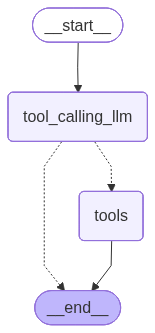

In [12]:
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools",END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
messages = graph.invoke({"messages":HumanMessage(content="Provide the 3 lastest  news about AI at 16th october 2025")})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Provide the 3 lastest  news about AI at 16th october 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_e458ade9-5cc6-494f-b7ed-ffd360628808)
 Call ID: fc_e458ade9-5cc6-494f-b7ed-ffd360628808
  Args:
    query: AI news October 16 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The Latest AI News and AI Breakthroughs that Matter Most: 2025", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "Summary: Reveal HealthTech, an AI-powered healthcare startup based in Bengaluru and the U.S., raised $7.2 million in a Series A round led by Leo Capital, with continued support from Sanos Capital, W Health Ventures, and 2070 Health. The funding will bolster its core products, BioCanvas, which accelerates clinical trial recruitment